In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [2]:
df1 = pd.read_csv('cip_ctx_ctz_gen_multi_data.csv')
df2 = pd.read_csv('cip_ctx_ctz_gen_pheno.csv')

# Data set 

### 1) Multi-data SNPs (single nucleotide polymorphism): 
	
Features: 

- prename: This is the isolate(sample) name.
- The other 60k plus features are the position of SNPs

Encoding: 
- A: Adenine = 1
- G: Guanine = 2
- C: Cytosine = 3
- T: Thymine = 4
- N: Null = 0 -> REFERENCE GENOME (locus without variation)


### 2) Phenotype:

Features: 

- CTX: This is the isolate's response to the drug cefotaxime.
- CTZ: This is the isolate's response to the drug ceftazidime
- GEN: This is the isolate's response to the drug gentamicin
- CIP: This is the isolate's response to the drug ciprofloxacin.
- Prename: the name of the sample

Encoding:

- 0 = Susceptible, 
- 1 = Resistant	

In [13]:
raw = pd.read_csv('ACTGN_input.csv')
raw.drop('Unnamed: 0', axis=1, inplace=True)
raw = raw.set_index('prename')

,Unnamed: 0,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,0,H100_S2_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
1,1,H105_S3_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
2,2,H108_S5_L001,G,A,G,T,C,C,N,N,...,C,T,T,G,A,C,A,C,C,A
3,3,H109_S2_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
4,4,H113_S6_L001,N,N,G,T,C,C,C,C,...,C,T,N,N,G,C,A,C,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,804,wwRBK-17-0298-1_S42,N,N,G,T,C,C,N,N,...,C,T,N,N,G,C,A,C,C,A
805,805,wwRBK-17-075-1_S28,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
806,806,wwRBL-16-111-1_S16,G,N,N,N,C,N,C,C,...,C,T,N,N,N,C,N,N,N,N
807,807,wwRBL-17-004-1_S44,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A


In [63]:
df2 = df2.set_index('prename')
df2

,CIP,CTX,CTZ,GEN
prename,,,,
H100_S2_L001,0,1,0,0
H105_S3_L001,1,1,0,0
H108_S5_L001,0,1,0,0
H109_S2_L001,0,1,0,0
H113_S6_L001,1,1,0,0
...,...,...,...,...
wwRBK-17-0298-1_S42,1,1,1,0
wwRBK-17-075-1_S28,1,1,1,1
wwRBL-16-111-1_S16,1,1,1,0


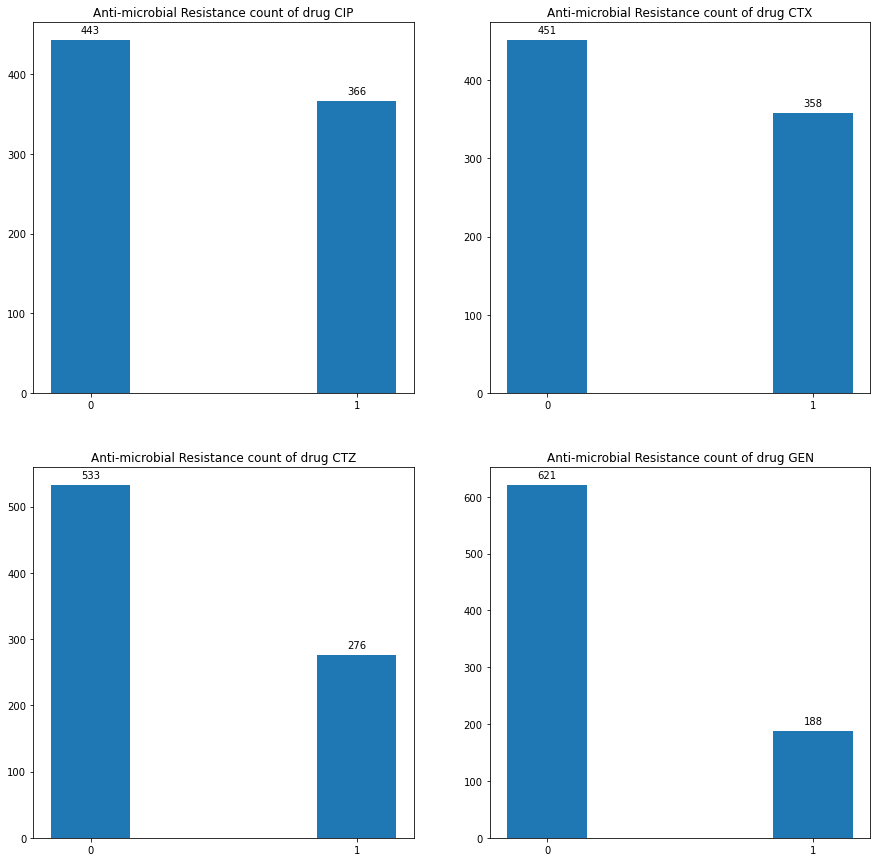

In [99]:
n_rows = 2
n_cols = 2
drugs = ['CIP', 'CTX', 'CTZ', 'GEN']
count = 0
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for row_num in range(n_rows):
    for col_num in range(n_cols):
        axes[row_num][col_num].hist(df2[drugs[count]], bins=np.arange(amr_count.min(), amr_count.max()-1), align='left', rwidth = 0.3)
        axes[row_num][col_num].set_title('Anti-microbial Resistance count of drug '+ drugs[count])
        axes[row_num][col_num].set_xticks([0,1])
        count += 1
        for rect in axes[row_num][col_num].patches:
            height = rect.get_height()
            axes[row_num][col_num].annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                        xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
        

In [73]:
y1 = df2['CIP']
y2 = df2['CTX']
y3 = df2['CTZ']
y4 = df2['GEN']

## Label Encoder

In [51]:
labels = raw.replace({'A':1, 'G':2, 'C':3, 'T':4, 'N':0})
labels

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
prename,,,,,,,,,,,,,,,,,,,,,
H100_S2_L001,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
H105_S3_L001,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
H108_S5_L001,2,1,2,4,3,3,0,0,4,2,...,3,4,4,2,1,3,1,3,3,1
H109_S2_L001,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
H113_S6_L001,0,0,2,4,3,3,3,3,4,2,...,3,4,0,0,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wwRBK-17-0298-1_S42,0,0,2,4,3,3,0,0,4,0,...,3,4,0,0,2,3,1,3,3,1
wwRBK-17-075-1_S28,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
wwRBL-16-111-1_S16,2,0,0,0,3,0,3,3,4,0,...,3,4,0,0,0,3,0,0,0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(labels, y1, test_size=0.15, random_state=0)

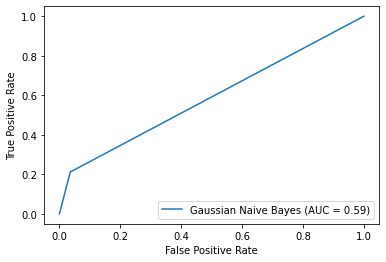

In [104]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y1_probs_gnb = nb.predict_proba(X_test)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y1_probs_gnb[:, 1])

roc_auc = metrics.auc(fpr_gnb, tpr_gnb)
display = metrics.RocCurveDisplay(fpr=fpr_gnb, tpr=tpr_gnb, roc_auc=roc_auc, estimator_name='Gaussian Naive Bayes')
display.plot()

plt.show()

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


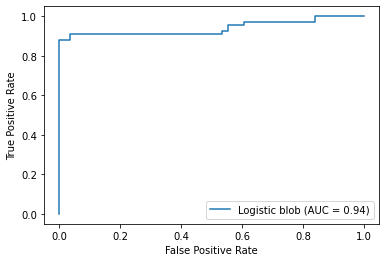

In [111]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y1_probs_logit = logit.predict_proba(X_test)

fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y1_probs[:, 1])

roc_auc_logit = metrics.auc(fpr_logit, tpr_logit)
display = metrics.RocCurveDisplay(fpr=fpr_logit, tpr=tpr_logit, roc_auc=roc_auc_logit, estimator_name='Logistic blob')
display.plot()
plt.show()

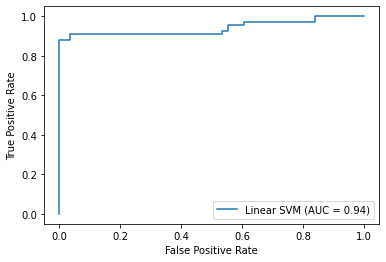

In [107]:
svc = SVC( probability=True)
svc.fit(X_train, y_train)
y1_probs_svc = svc.predict_proba(X_test)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y1_probs[:, 1])

roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)
display = metrics.RocCurveDisplay(fpr=fpr_svc, tpr=tpr_svc, roc_auc=roc_auc_svc, estimator_name='Linear SVM')
display.plot()
plt.show()

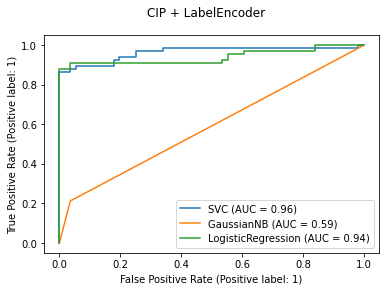

In [117]:
X_train, X_test, y_train, y_test = train_test_split(labels, y1, test_size=0.15, random_state=0)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=svc_disp.ax_)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=svc_disp.ax_)
logit_disp.figure_.suptitle("CIP + LabelEncoder")

plt.show()

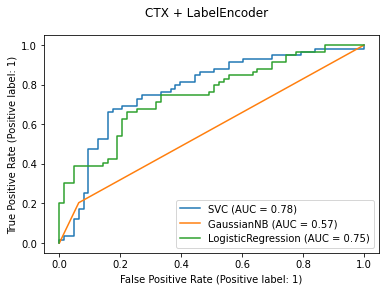

In [118]:
X_train, X_test, y_train, y_test = train_test_split(labels, y2, test_size=0.15, random_state=0)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=svc_disp.ax_)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=svc_disp.ax_)
logit_disp.figure_.suptitle("CTX + LabelEncoder")

plt.show()

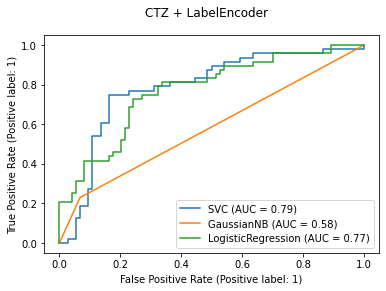

In [119]:
X_train, X_test, y_train, y_test = train_test_split(labels, y3, test_size=0.15, random_state=0)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=svc_disp.ax_)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=svc_disp.ax_)
logit_disp.figure_.suptitle("CTZ + LabelEncoder")

plt.show()

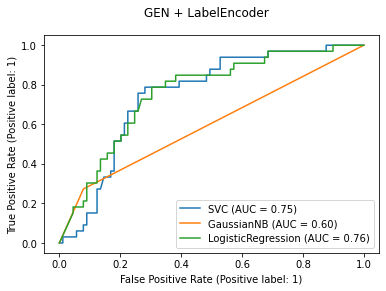

In [120]:
X_train, X_test, y_train, y_test = train_test_split(labels, y4, test_size=0.15, random_state=0)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=svc_disp.ax_)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=svc_disp.ax_)
logit_disp.figure_.suptitle("GEN + LabelEncoder")

plt.show()

## One Hot Encoder

In [52]:
onehot = OneHotEncoder(drop='first').fit_transform(raw)
onehot

<809x75341 sparse matrix of type '<class 'numpy.float64'>'
	with 15921795 stored elements in Compressed Sparse Row format>

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


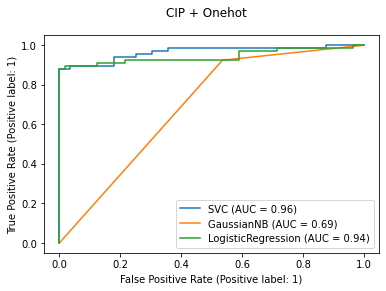

In [124]:
X_train, X_test, y_train, y_test = train_test_split(onehot.toarray(), y1, test_size=0.15, random_state=0)

nb = GaussianNB().fit(X_train, y_train)
logit = LogisticRegression().fit(X_train, y_train)
svc = SVC(probability=True).fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
gnb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=svc_disp.ax_)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=svc_disp.ax_)
logit_disp.figure_.suptitle("CIP + Onehot")

plt.show()